
# <font color='blue'>FUMEC - Analytics com Python
# 3a Avaliação - PROVA FINAL (valor: 30 pontos)</font>


---

### **LEIA ATENTAMENTE AS INSTRUÇÕES ABAIXO:**

**ATENÇÃO**

1. O tempo de duração da avaliação é de 1 hora e 40 minutos.

2. A avaliação tem valor de 30 pontos.Fique atento ao valor de cada questão.

3. Leve a sério sua prova e, com tranquilidade, faça-a da melhor maneira
possível como um comprovante de seus esforços.

4. A avaliação deve ser feita INDIVIDUALMENTE, sem qualquer consulta aos colegas. Sua consciência e ética serão os seus próprios juízes.

5. Questões discursivas com respostas idênticas ou suspeitas serão penalizadas.

6. Para salvar a avaliação e realizar o upload no Google Forms da prova, use uma das opções abaixo:

*   **Jupyter Notebook**: opção do menu "File --> Download as --> Notebook (.ipynb)
*   **Google Colaboratory**: opção do menu "File --> Download .ipynb"


Salve o seu arquivo com o nome <font color='red'>**SeuNome_3a_avalicao.ipynb**</font>


**BOA AVALIAÇÃO!**

---

## **Identificação do aluno(a)**





**Número do registro acadêmico**:


In [ ]:
226804875


**Nome do aluno(a)**:

In [ ]:
Eduardo Augusto Lima Pereira

---

# Apresentação

Você deverá reproduzir os passos para apresentar um exemplo da tarefa de classificação. Você precisará carregar os dados de um arquivo, preparar os dados e executar as etapas de treinamento e teste.


## Conjunto de dados

* O arquivo de dados a ser utilizado está disponível no link https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data.

* Os dados a serem trabalhados correspondem a um conjunto de avaliação de carros de acordo com diferentes critérios, tais como preço, capacidade, segurança etc.

* A ideia é gerar um modelo classificador para predizer qual seria a avaliação do carro de acordo com os critérios do arquivo.

* As colunas originais do arquivo estão descritas abaixo:

   1. **buying**: v-high, high, med, low
   2. **maint**: v-high, high, med, low
   3. **doors**: 2, 3, 4, 5-more
   4. **persons**: 2, 4, more
   5. **lug_boot**: small, med, big
   6. **safety**: low, med, high
   7. **evaluation**: unacc, acc, good, v-good

* A coluna **evaluation** será a classe a ser predita pelo classificador.

# Questões

As questões propostas serão avaliadas de acordo com a exequibilidade do código, clareza, profundidade e os recursos utilizados para resolver a tarefa proposta.

### **01) Carregar o dataset (5 pontos)**:



Importar as bibliotecas necessárias

In [178]:
# importar as bibliotecas
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from joblib import dump, load
from sklearn import tree

Carregar o arquivo https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data para um dataframe da biblioteca pandas

Usar os seguintes nomes para as colunas do arquivo (nesta ordem): **preco, manutencao, num_portas, lugares, porta_malas, seguranca, avaliacao**

A coluna **avaliacao** contém a classe alvo para o classificador 

In [179]:
# carregar os dados
cols = ['preco', 'manutencao', 'num_portas', 'lugares', 'porta_malas', 'seguranca', 'avaliacao']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=cols)

In [180]:
df.head()

,preco,manutencao,num_portas,lugares,porta_malas,seguranca,avaliacao
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### **02) Realizar uma análise exploratória para conhecer os dados  (5 pontos)**:

Solução

In [181]:
df.describe()

,preco,manutencao,num_portas,lugares,porta_malas,seguranca,avaliacao
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,more,small,med,unacc
freq,432,432,432,576,576,576,1210


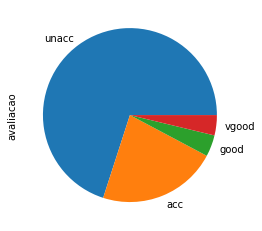

In [182]:
df['avaliacao'].value_counts().plot(kind='pie');

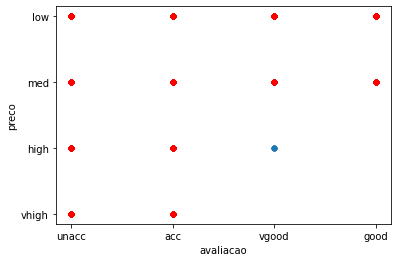

In [183]:
ax = plt.gca()

df.plot(kind='scatter', x='avaliacao', y='manutencao', ax=ax)
df.plot(kind='scatter', x='avaliacao', y='preco', color='red', ax=ax)

plt.show()

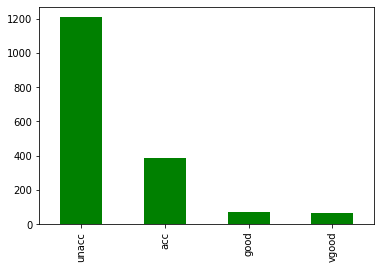

In [184]:
#df['seguranca'].value_counts().plot(kind='bar', color='green');
df['avaliacao'].value_counts().plot(kind='bar', color='green');

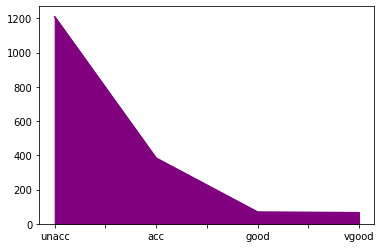

In [185]:
#df['porta_malas'].value_counts().plot(kind='area', color='purple');
df['avaliacao'].value_counts().plot(kind='area', color='purple');

### **03) Realizar as transformações de tipos de dados necessárias (5 pontos)**:

**Exemplo**: transformar os dados dos atributos em valores numéricos

**Dica**: criar um novo dataframe e depois incluir todas as colunas transformadas

```
novo_df['coluna'] = df['coluna'].apply(lambda x: 0 if x == 'valor_0' else 1 if x == 'valor_1' else 2)
```



Solução

In [186]:
# visualizar os dados atuais
df.head()

,preco,manutencao,num_portas,lugares,porta_malas,seguranca,avaliacao
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [187]:
# aplicar as transformações de dados ao novo_df
novo_df = pd.DataFrame()

novo_df['preco_encod'] = df['preco'].apply(lambda x: 0 if x == 'low' else 1 if x == 'med' else 2 if x == 'high' else 3)
novo_df['manutencao_encod'] = df['manutencao'].apply(lambda x: 0 if x == 'low' else 1 if x == 'med' else 2 if x == 'high' else 3)
novo_df['num_portas_encod'] = df['num_portas'].apply(lambda x: 0 if x == '2' else 1 if x == '3' else 2 if x == '4' else 3)
novo_df['lugares_encod'] = df['lugares'].apply(lambda x: 0 if x == '2' else 1 if x == '4' else 2)
novo_df['porta_malas_encod'] = df['porta_malas'].apply(lambda x: 0 if x == 'small' else 1 if x == 'med' else 2)
novo_df['segurancao_encod'] = df['seguranca'].apply(lambda x: 0 if x == 'low' else 1 if x == 'med' else 2)
novo_df['avaliacao_encod'] = df['avaliacao'].apply(lambda x: 0 if x == 'unacc' else 1 if x == 'acc' else 2 if x == 'good' else 3)

novo_df['avaliacao_encod'].unique()

array([0, 1, 3, 2])

In [188]:
# visualizar as modificacoes
novo_df.head()

,preco_encod,manutencao_encod,num_portas_encod,lugares_encod,porta_malas_encod,segurancao_encod,avaliacao_encod
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


In [189]:
novo_df.describe()

,preco_encod,manutencao_encod,num_portas_encod,lugares_encod,porta_malas_encod,segurancao_encod,avaliacao_encod
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.414931
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.740700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


### **04) Preparar os conjuntos de dados (5 pontos)**:

Separar o novo dataframe transformado em dois conjuntos X e y, onde X terá os **atributos** e em y terá apenas a coluna referente à classe **avaliacao**

In [190]:
# separar o novo dataframe
novo_df.head()

y = novo_df[['avaliacao_encod']]
y.head()

X = novo_df.iloc[:, 0:6]
X.head()

,preco_encod,manutencao_encod,num_portas_encod,lugares_encod,porta_malas_encod,segurancao_encod
0,3,3,0,0,0,0
1,3,3,0,0,0,1
2,3,3,0,0,0,2
3,3,3,0,0,1,0
4,3,3,0,0,1,1


In [191]:
X.describe()

,preco_encod,manutencao_encod,num_portas_encod,lugares_encod,porta_malas_encod,segurancao_encod
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


In [192]:
y.describe()

,avaliacao_encod
count,1728.000000
mean,0.414931
std,0.740700
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


Separar o novo dataframe nos conjuntos de **treino** (80% dos dados) e **teste** (20% dos dados) para respectivamente treinar e testar o classificador, gerando os conjuntos `X_train`, `X_test`, `y_train`, `y_test`

In [193]:
# gerar os conjuntos para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [194]:
# validar a separação
print(np.shape(X))
print(np.shape(y))
print()
print(np.shape(X_train))
print(np.shape(X_test))
print()
print(np.shape(y_train))
print(np.shape(y_test))

(1728, 6)
(1728, 1)

(1382, 6)
(346, 6)

(1382, 1)
(346, 1)


### **05) Treinar e testar o classificador (5 pontos)**:

Escolher o método de classificação que quiser para treinar e testar o classificador. 

Você está livre para escolher o método de classificação que quiser. 


Solução

In [195]:
# treinar o classificador
m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [196]:
# testar o classificador e gerar as predições
np.ravel(y_train)
preditas = m.predict(X_test.iloc[0:35])
reais = np.ravel(y_test[0:35])

In [197]:
# comparar algumas predições do classificador com as classes reais
print('Classes preditas: ', preditas)
print('Classes reais...: ', reais)

Classes preditas:  [0 0 0 1 0 0 0 0 1 0 0 3 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 2 0 2 1 1 2]
Classes reais...:  [0 0 0 1 0 0 0 0 1 0 0 3 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 2 0 2 1 1 2]


### **06) Avaliação do classificador (5 pontos)**:

Apresentar a acurácia e a matriz de confusão do seu classificador. Se der tempo, você ainda apresentar o resultado de outros classificadores para comparação.

Solução

In [198]:
# apresentar a acurácia do classificador
m.score(X_test, y_test)

0.9450867052023122

In [199]:
# apresentar a matriz de confusão do classificador
confusion_matrix(y_test, m.predict(X_test))

array([[238,   4,   0,   0],
       [  8,  69,   0,   0],
       [  1,   1,  12,   0],
       [  0,   2,   3,   8]])

In [200]:
# resultado de outros classificadores
gnb = GaussianNB()
gnb.fit(X_train, np.ravel(y_train))

print(gnb.score(X_test, y_test), '\n')
confusion_matrix(y_test, gnb.predict(X_test))

0.708092485549133 



array([[213,   6,   0,  23],
       [ 30,  16,   4,  27],
       [  2,   1,   3,   8],
       [  0,   0,   0,  13]])

### <font color='red'>ATENÇÃO:<font>
Para salvar a avaliação e realizar o upload no Google Forms da prova, use uma das opções abaixo:

*   **Jupyter Notebook**: opção do menu "File --> Download as --> Notebook (.ipynb)
*   **Google Colaboratory**: opção do menu "File --> Download .ipynb"


Salve o seu arquivo com o nome <font color='red'>**SeuNome_3a_avalicao.ipynb**</font>